# Preprocessing atlas: Wang

<div class="alert alert-warning">

**What this notebook does**

In this notebook, the count table of the Human atlas of van Wang et.al. will be loaded into scanpy and be annotated for future processing, integration and downstream analysis.
</div>  



### Loading libraries
Using sc2_seurat environment, importing packages and setting parameters.

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import matplotlib.pyplot as plt
import h5py
import scipy

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

### h5 files

In [3]:
path='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/wang_2022'
prefix='SAMN218894'
suffix='_cellbender_filtered.h5'

S06=f'{path}/{prefix}06/outs/{prefix}06{suffix}'
S07=f'{path}/{prefix}07/outs/{prefix}07{suffix}'
S09=f'{path}/{prefix}09/outs/{prefix}09{suffix}'
S11=f'{path}/{prefix}11/outs/{prefix}11{suffix}'
S16=f'{path}/{prefix}16/outs/{prefix}16{suffix}'
S22=f'{path}/{prefix}22/outs/{prefix}22{suffix}'
S23=f'{path}/{prefix}23/outs/{prefix}23{suffix}'
S24=f'{path}/{prefix}24/outs/{prefix}24{suffix}'
S33=f'{path}/{prefix}33/outs/{prefix}33{suffix}'
S36=f'{path}/{prefix}36/outs/{prefix}36{suffix}'


In [4]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing')

In [5]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/1_preprocessing'

## Load data

In [6]:
files = [S06,S07,S09,S11,S16,S22,S23,S24,S33,S36]
names = ['S06','S07','S09','S11','S16','S22','S23','S24','S33','S36'] #used for making variable names

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S06 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S07 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S09 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S11 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S16 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S22 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S23 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S24 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_S33 is loaded
adata_S36 is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [7]:
for i in range(numberobj):
    print(locals()["adata"+"_"+names[i]])

AnnData object with n_obs × n_vars = 32447 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 21430 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 7225 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 6650 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 14994 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 13141 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 15427 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 21441 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 12100 × 60656
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 9064 × 60656
    var: 'gene_ids', 'feature_types', 'genome'


## Basic Preprocessing
### Doublet detection using scrublet
Doublets are droplets that captures two cells, which will lead to inconsistencies. So we need to detect and remove them. First we will annotate the objects with metadata.

https://github.com/swolock/scrublet
https://www.sciencedirect.com/science/article/pii/S2405471218304745

Following the advice of Chromium (below). The expected cells are and expected doublet rates: 

SAMN21889406	18829		0.1418	\
SAMN21889407	14068		0.1065	\
SAMN21889409	19450		0.1466	\
SAMN21889411	4782		0.0373	\
SAMN21889416	10243		0.0777	\
SAMN21889422	7804		0.0596	\
SAMN21889423	7421		0.0569	\
SAMN21889424	5017		0.0391	\
SAMN21889433	11055		0.0834	\
SAMN21889436	2165		0.0172	


> https://uofuhealth.utah.edu/huntsman/shared-resources/gba/htg/single-cell/genomics-10x.php

\
First check the recommended threshold by scrublet (minimum mode of real and simulate data). With good bimodel distribution it should be fine otherwise set a threshold manually.


In [8]:
names

['S06', 'S07', 'S09', 'S11', 'S16', 'S22', 'S23', 'S24', 'S33', 'S36']

In [9]:
numberobj

10

In [10]:
#manually adding metadata due to lack of metadata file
for i in range(numberobj):
    locals()[object_names[i]].obs['species'] = ['Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien','Homo sapien'][i]
    locals()[object_names[i]].obs['gender'] = ['female','female','female','male','female','male','male','female','female', 'male'][i]
    locals()[object_names[i]].obs['age'] = ['93 years','93 years','91 years','73 years','93 years','77 years','89 years','82 years','72 years', '84 years'][i]
    locals()[object_names[i]].obs['atlas'] = ['wang','wang','wang','wang','wang','wang','wang','wang','wang','wang'][i]
    locals()[object_names[i]].obs['sample'] = ['SAMN21889406','SAMN21889407','SAMN21889409','SAMN21889411','SAMN21889416','SAMN21889422','SAMN21889423','SAMN21889424','SAMN21889433','SAMN21889436'][i]
    
    
#viewing object annotations
for i in range(numberobj):
    print(locals()[object_names[i]].shape)
    

thr = None
expected_doublet_rates = [0.1418, 0.1065, 0.1466, 0.0373, 0.0777, 0.0596, 0.0569, 0.0391, 0.0834, 0.0172]
for i in range(numberobj):
    #predicts doublets and adds a score to objects
    sc.external.pp.scrublet(locals()[object_names[i]], expected_doublet_rate=expected_doublet_rates[i], stdev_doublet_rate=0.02, 
                            synthetic_doublet_umi_subsampling=1.0, knn_dist_metric='euclidean', normalize_variance=True, 
                            log_transform=False, mean_center=True, n_prin_comps=30, use_approx_neighbors=True, 
                            get_doublet_neighbor_parents=False, n_neighbors=None, threshold=thr, verbose=True, copy=False, random_state=0)
    #plot histogram of doublet scores(doesnt work in loop)
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),
                                               show=True,return_fig=True)


(32447, 60656)
(21430, 60656)
(7225, 60656)
(6650, 60656)
(14994, 60656)
(13141, 60656)
(15427, 60656)
(21441, 60656)
(12100, 60656)
(9064, 60656)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 12.5%
Estimated detectable doublet fraction = 42.1%
Overall doublet rate:
	Expected   = 14.2%
	Estimated  = 29.6%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 8.6%
Estimated detectable doublet fraction = 35.3%
Overall doublet rate:
	Expected   = 10.7%
	Estimated  = 24.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Automatically set threshold at doublet score = 0.06
Detected doublet rate = 79.7%
Estimated detectable doublet fraction = 93.5%
Overall doublet rate:
	Expected   = 14.7%
	Estimated  = 85.3%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.5%
Overall doublet rate:
	Expected   = 3.7%
	Estimated  = 2.1%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 7.8%
	Estimated  = 25.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.7%
	Estimated  = 0.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 0.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 32.3%
Overall doublet rate:
	Expected   = 8.3%
	Estimated  = 15.0%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.4%
Overall doublet rate:
	Expected   = 1.7%
	Estimated  = 0.9%


Check how many cells are higher than the threshold

In [11]:
for i in range(numberobj):
    print(names[i],'\n',locals()[object_names[i]].obs['predicted_doublet'].value_counts(),'\n')

S06 
 False    28134
True      4014
Name: predicted_doublet, dtype: int64 

S07 
 False    19409
True      1835
Name: predicted_doublet, dtype: int64 

S09 
 True     5431
False    1382
Name: predicted_doublet, dtype: int64 

S11 
 False    6589
True        5
Name: predicted_doublet, dtype: int64 

S16 
 False    14882
True         2
Name: predicted_doublet, dtype: int64 

S22 
 False    12944
Name: predicted_doublet, dtype: int64 

S23 
 False    15379
Name: predicted_doublet, dtype: int64 

S24 
 False    21050
Name: predicted_doublet, dtype: int64 

S33 
 False    11282
True       575
Name: predicted_doublet, dtype: int64 

S36 
 False    8824
True        2
Name: predicted_doublet, dtype: int64 



### Scrublet simulation plot

S06


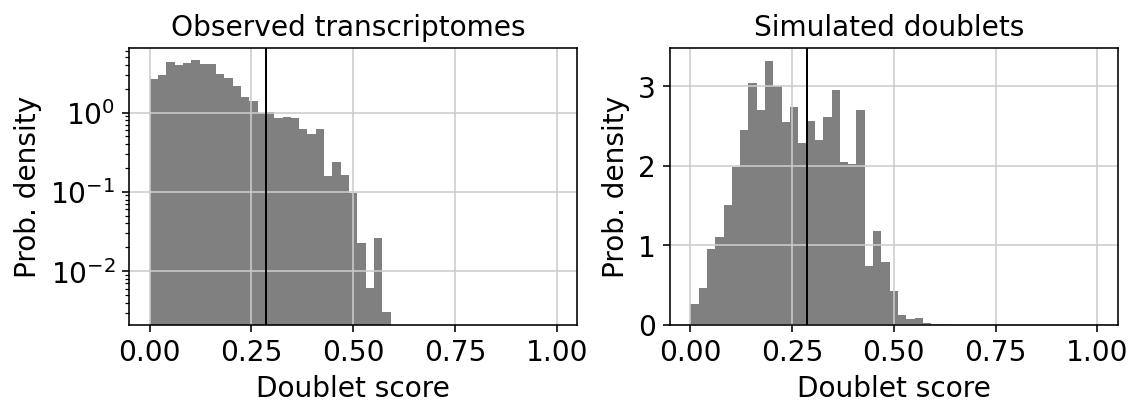

S07


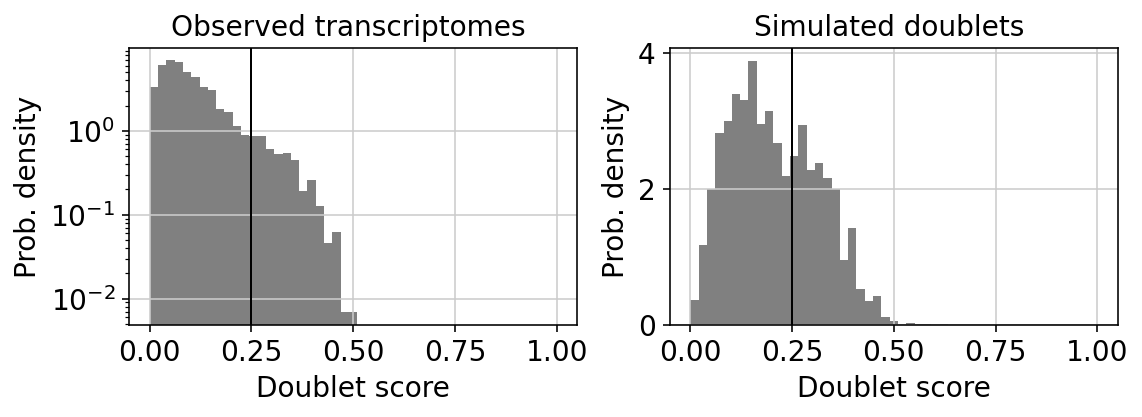

S09


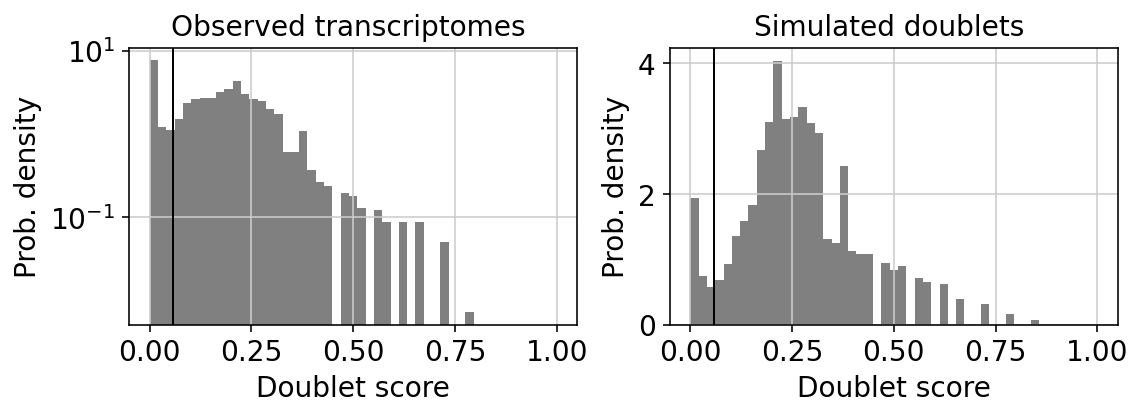

S11


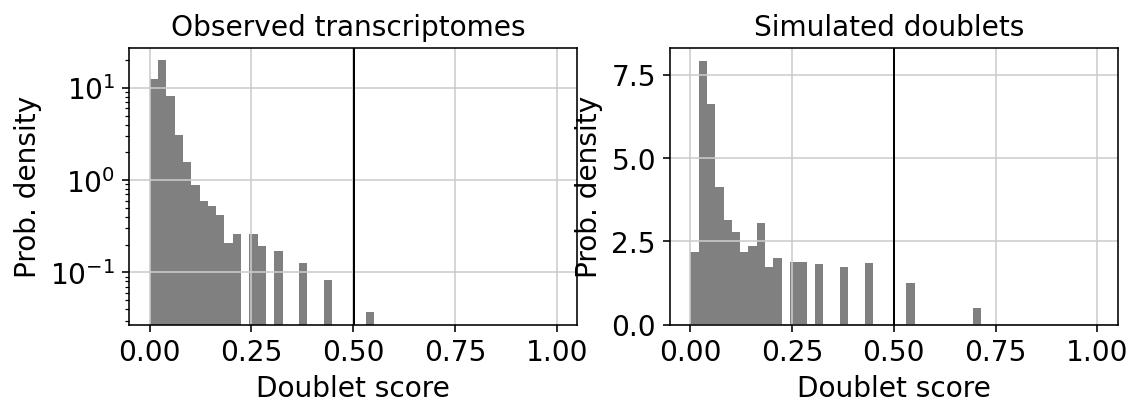

S16


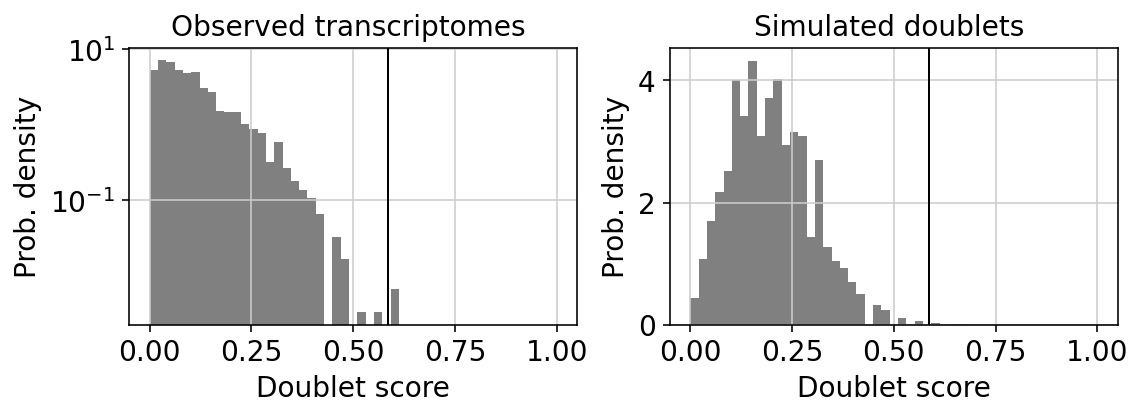

S22


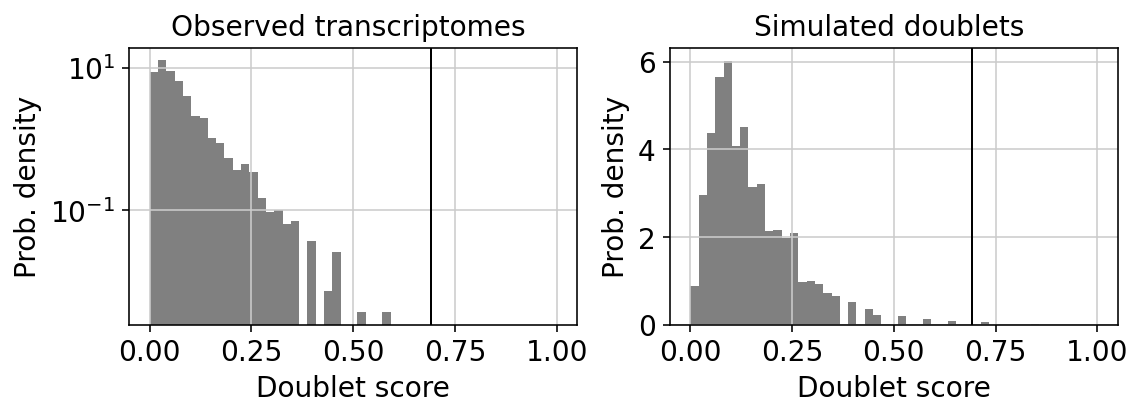

S23


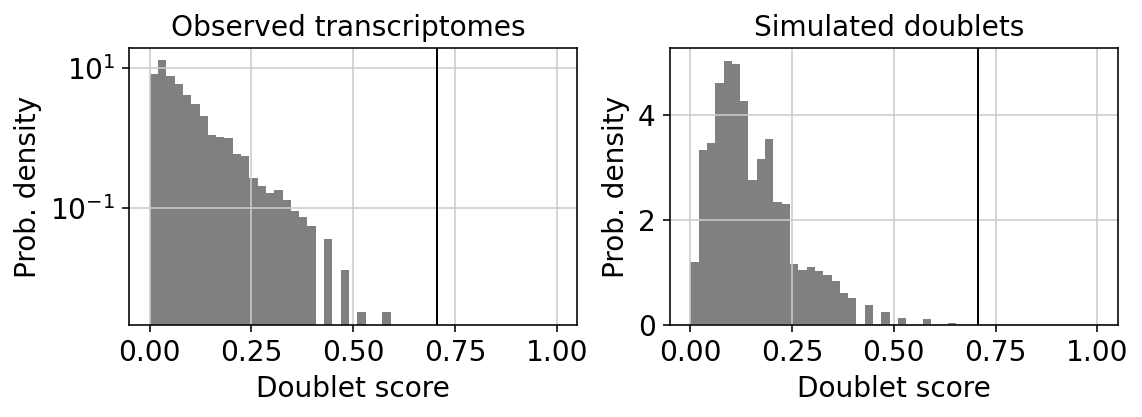

S24


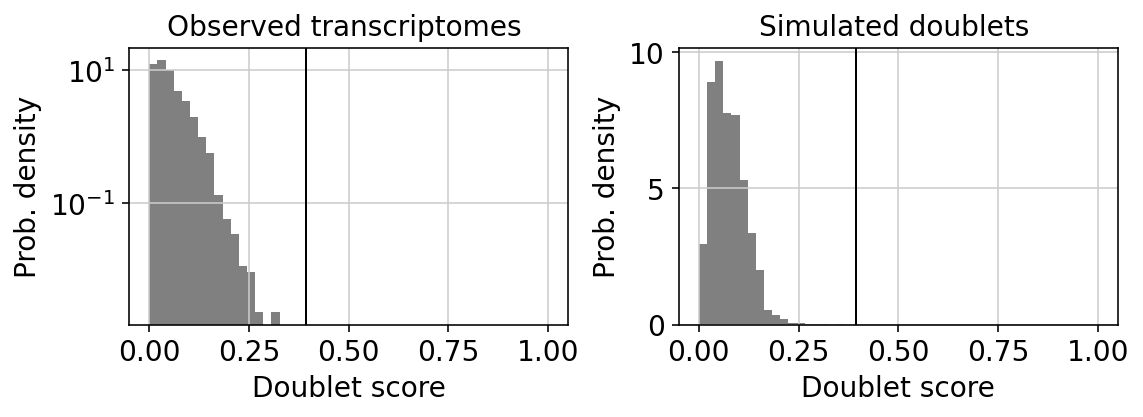

S33


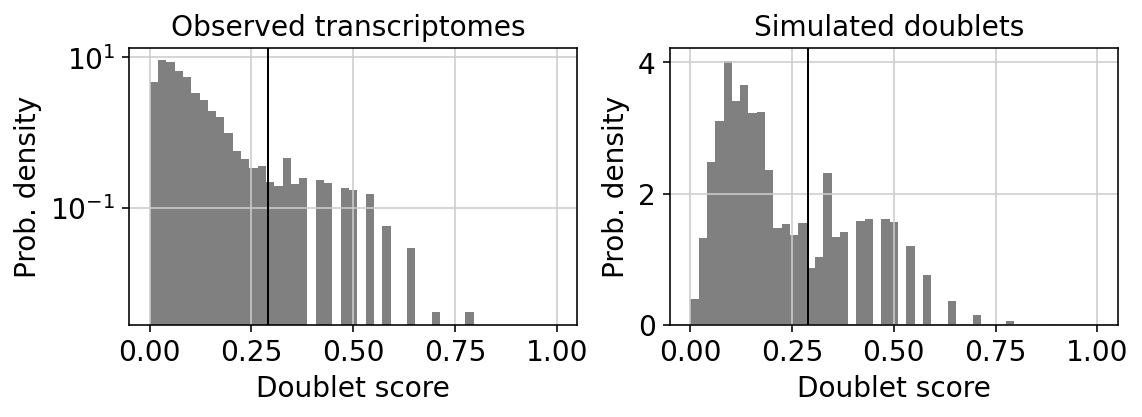

S36


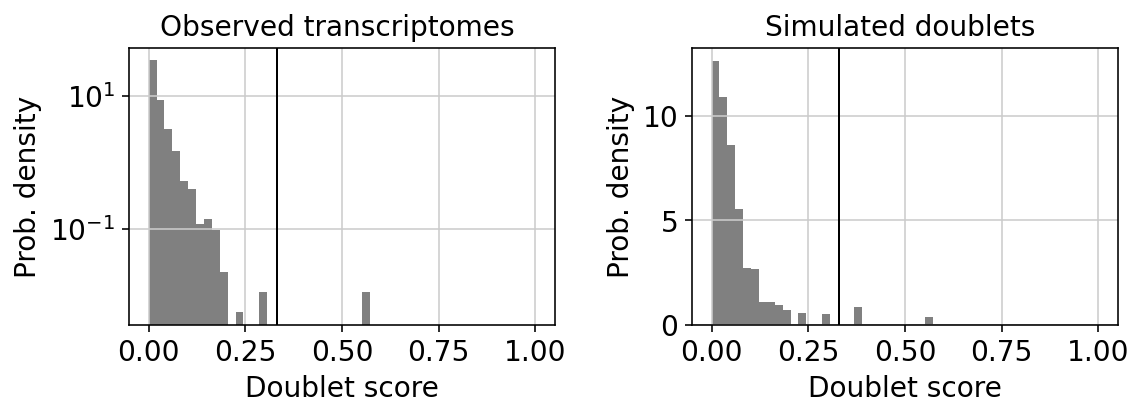

In [12]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),show=True,return_fig=True)

### Add QC and get rid of mitochondrial genes

In [15]:
adata_S07


AnnData object with n_obs × n_vars = 21254 × 60656
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'

<b> check this: sc.pp.calculate_qc_metrics() </b> <br>
expr_type: kind of values in X (str)<br>
var_type: kind of variables (str)<br>
qc_vars: keys for variables you want to control (collection of str)<br>
percent_top: proportions of top genes to cover, for cummulative proportion of counts (collection of int)<br>
layer: alternative layers for expression data (str)<br>
use_raw: use adata.raw.X for expression values (bool)<br>
inplace: place metrics in adata (bool)<br>
log1p: compute log1p transformed annotations, for very small values (bool)<br>
<br>
<b> return features obs </b> <br>
n_genes_by_counts: The number of genes with at least 1 count in a cell. <br>
total_counts: Total number of counts for a cell. <br>
total_counts_mt:Total number of mt gene counts for a cell. <br>
pct_counts_mt: Proportion (%) of total counts for a cell which are mitochondrial. <br> 
n_genes: Number of genes with a positive count. <br>
total_counts_ribo: Total number of ribosomal counts for a cell. <br>
pct_counts_ribo: Proportion of total counts for a cell which are ribosomal.

In [16]:
import numpy as np

for i in range(numberobj):
    #add mt variable annotation indicating if a gene is ribosomal or not (bool)
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('MT-')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('mt-') 
        
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('RP')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('Rp')
    
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=('mt','ribo'), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
     
    locals()[object_names[i]].var_names_make_unique()
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1) #remove all cells with 0 genes
                 
    # The following is to solve a save issue. Probably because of the NA valies in ther 'predicted_doublet' slot
    locals()[object_names[i]].obs['predicted_doublet'] =  locals()[object_names[i]].obs['predicted_doublet'].astype('str')

    

Checking median number of mitochondrial genes, genes and UMIs per cell to have an idea of the quality of each run:

In [17]:
print("Median numbers before filtering mt genes")
for i in range(numberobj):
    print(
         object_names[i],'\n',"\tmito%:",np.median(locals()[object_names[i]].obs['pct_counts_mt']),'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']),'\n', 
            "\tmedian reads/nuclei:",np.median(locals()[object_names[i]].obs['total_counts']),'\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:",  int(np.mean(locals()[object_names[i]].obs['total_counts'])), '\n')
    

Median numbers before filtering mt genes
adata_S06 
 	mito%: 17.159763313609467 
 	median genes/nuclei: 515.0 
 	median reads/nuclei: 952.0 
 	mean genes/nuclei: 933 
 	mean reads/nuclei: 2230 

adata_S07 
 	mito%: 9.39559476203642 
 	median genes/nuclei: 865.5 
 	median reads/nuclei: 1421.0 
 	mean genes/nuclei: 1049 
 	mean reads/nuclei: 2280 

adata_S09 
 	mito%: 80.91286307053942 
 	median genes/nuclei: 117.0 
 	median reads/nuclei: 607.0 
 	mean genes/nuclei: 213 
 	mean reads/nuclei: 793 

adata_S11 
 	mito%: 13.877939800694357 
 	median genes/nuclei: 409.0 
 	median reads/nuclei: 632.0 
 	mean genes/nuclei: 448 
 	mean reads/nuclei: 878 

adata_S16 
 	mito%: 0.34086067319982954 
 	median genes/nuclei: 640.0 
 	median reads/nuclei: 849.0 
 	mean genes/nuclei: 806 
 	mean reads/nuclei: 1283 

adata_S22 
 	mito%: 7.982491248800879 
 	median genes/nuclei: 510.0 
 	median reads/nuclei: 756.0 
 	mean genes/nuclei: 882 
 	mean reads/nuclei: 1966 

adata_S23 
 	mito%: 32.66129032258064 

Filtering out mito genes to determine number of non mitochondrial genes:

In [18]:
for i in range(numberobj):
    #list all non mitochondrial genes for subsetting the columns
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
         non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('MT-')]
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('mt-')]
    
    
    locals()[object_names[i]] = locals()[object_names[i]][:, non_mito_genes_list].copy()
    
    locals()[object_names[i]].obs['total_counts_mito'] =  locals()[object_names[i]].obs['total_counts']
    
    
    #recalculate the number of genes, because some cells only had mt gene counts
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1)

### Recalculate metrics 
Note that the qc_vars=None because we want to keep the mt%."


In [19]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)

Check for the basic statistics

In [20]:
sc.set_figure_params(figsize=[8,8])

S06


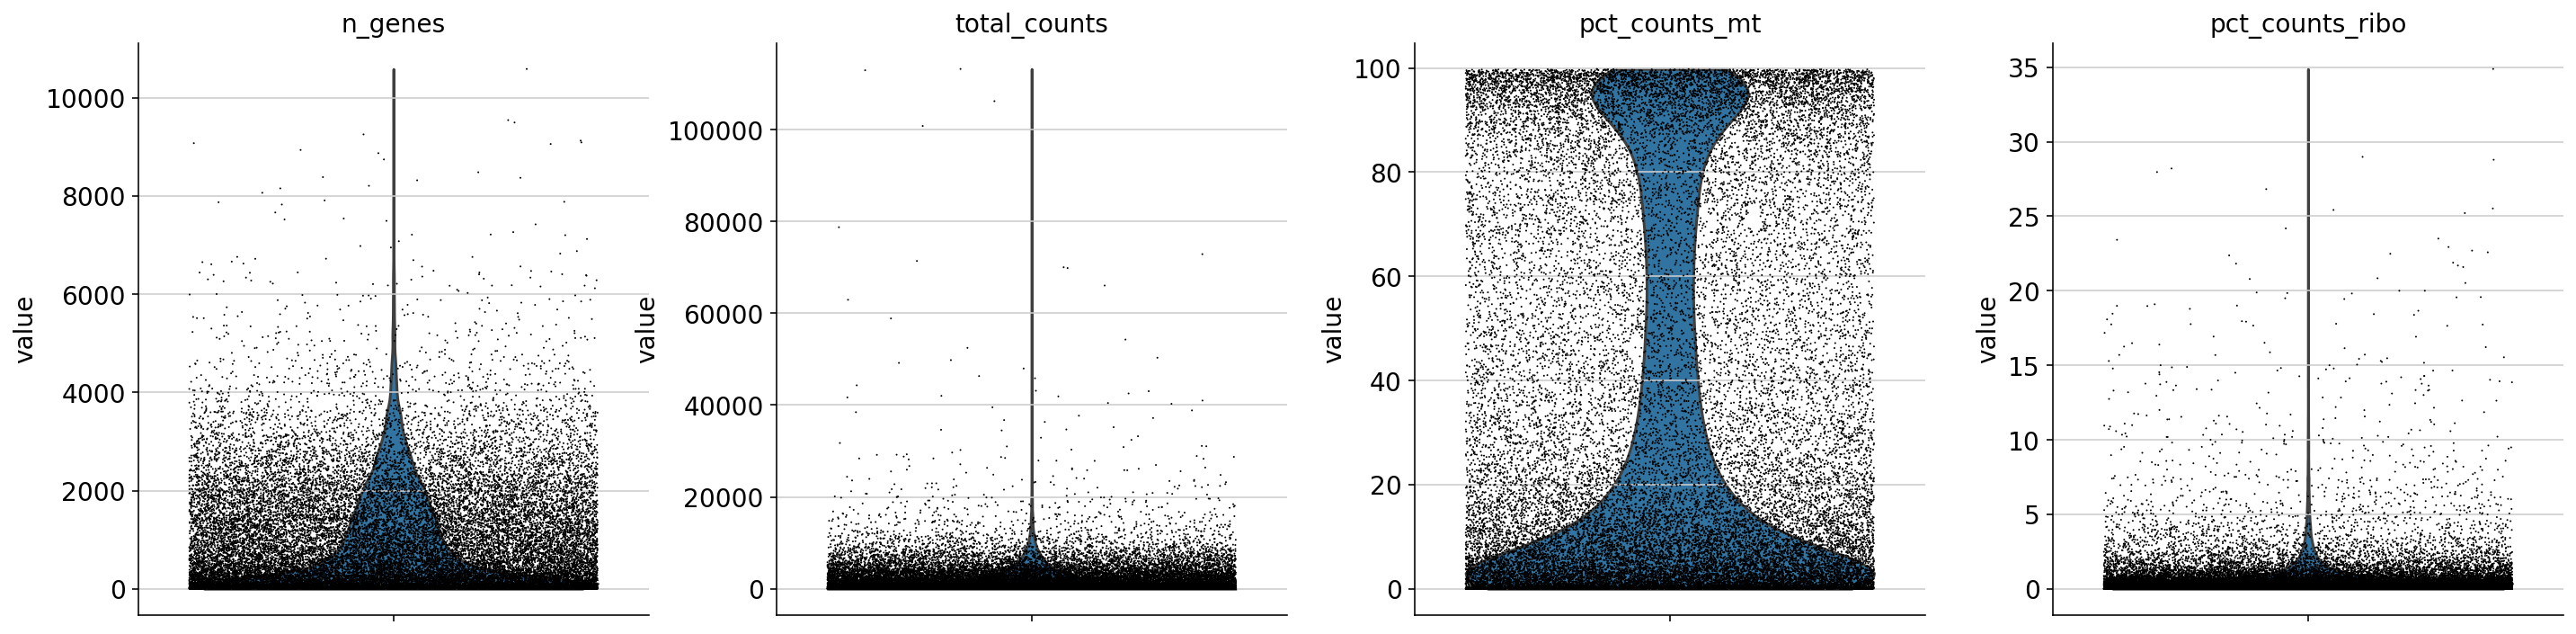

S07


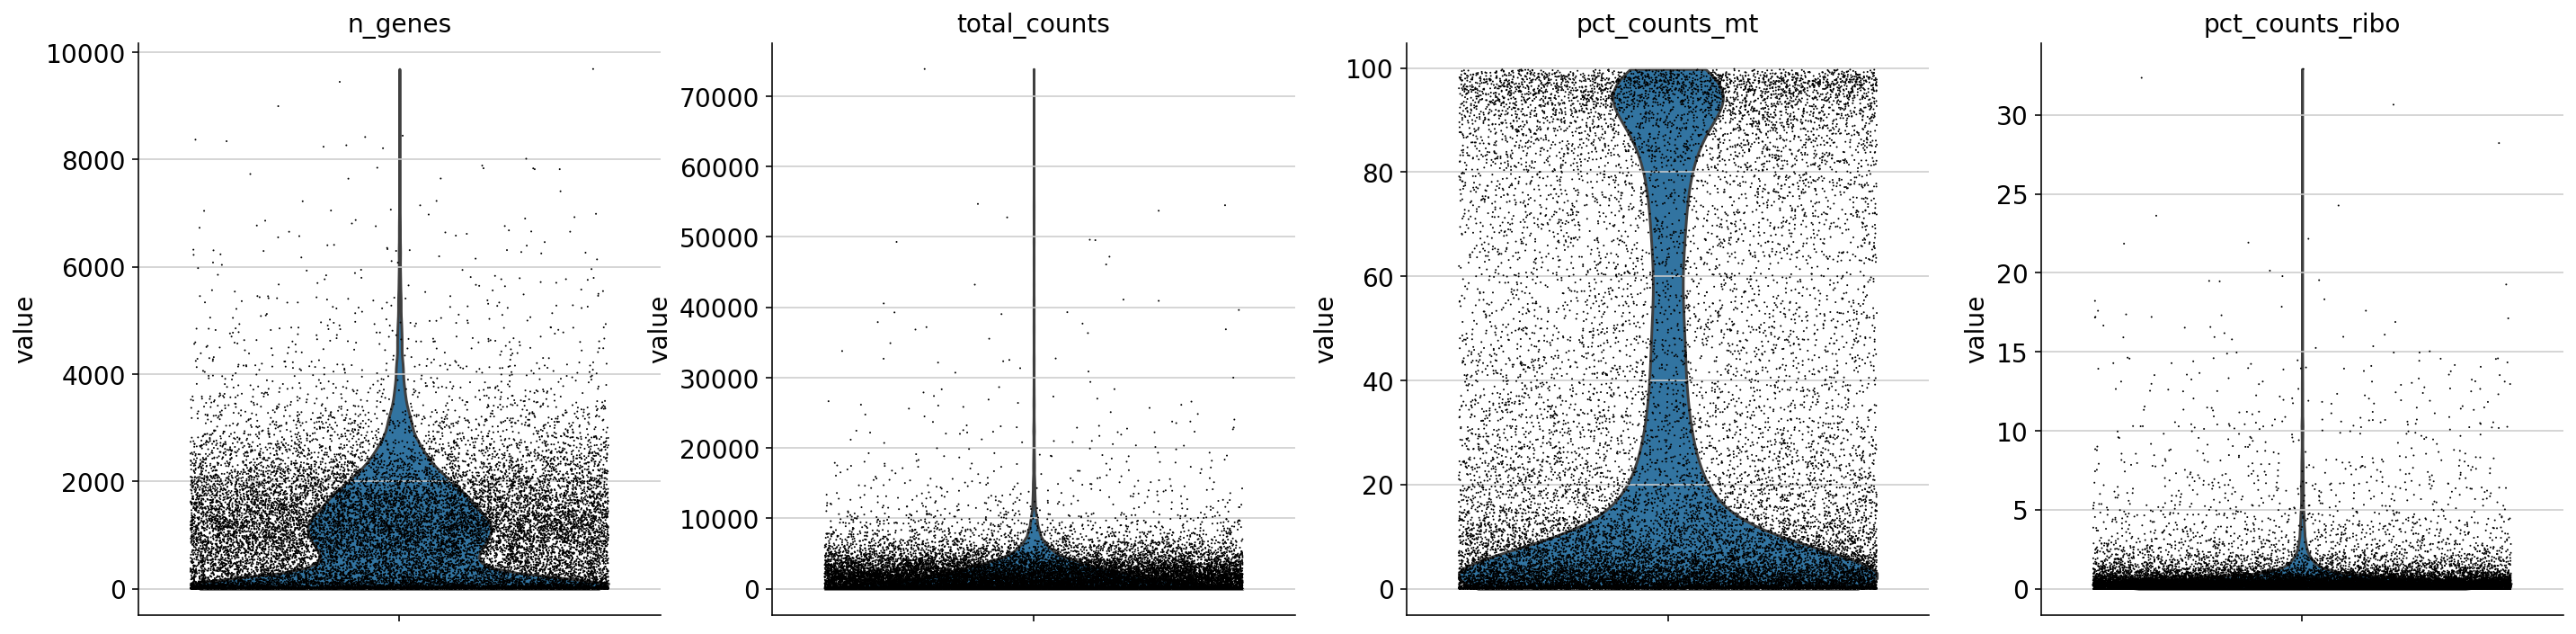

S09


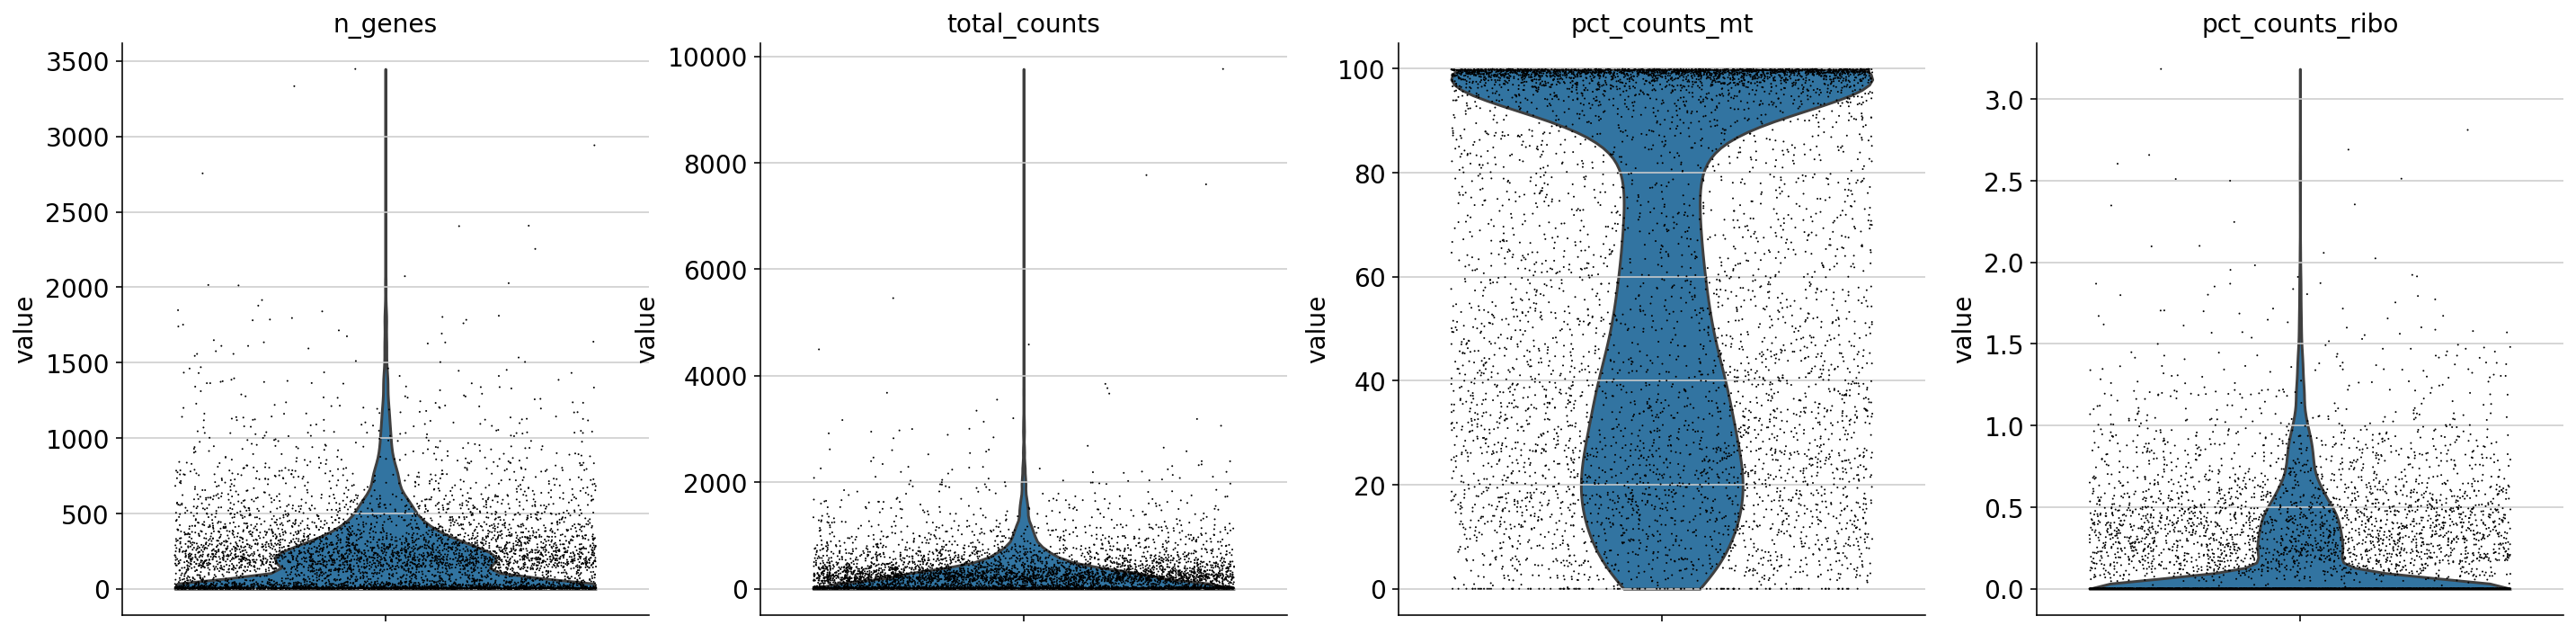

S11


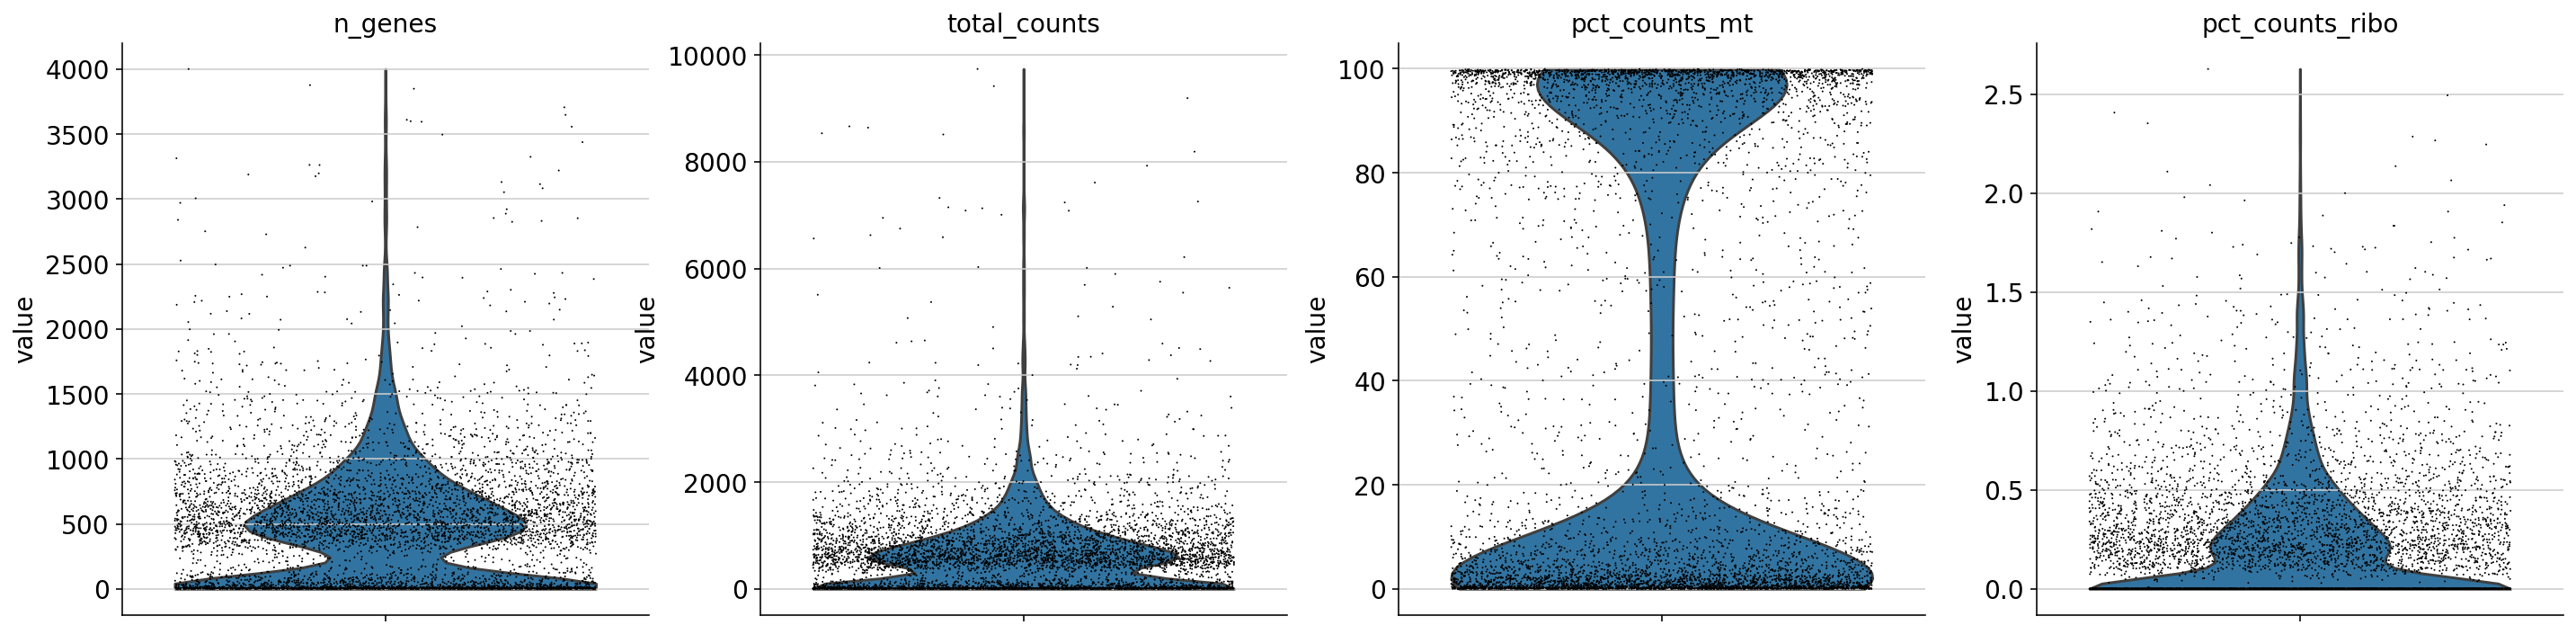

S16


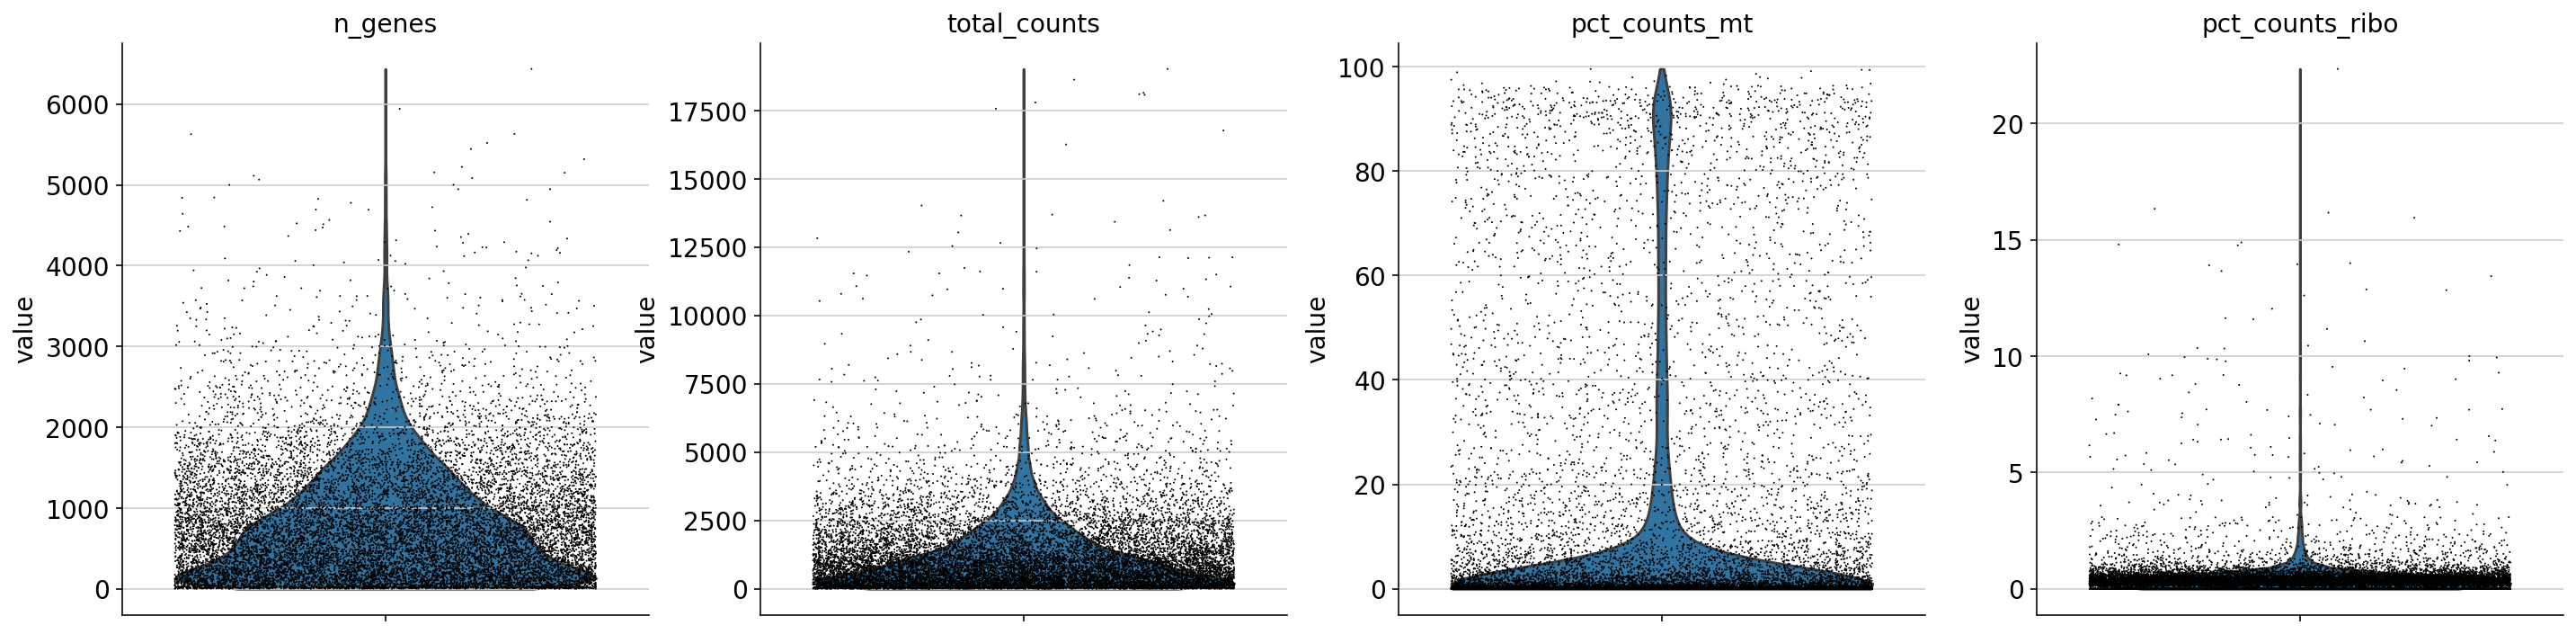

S22


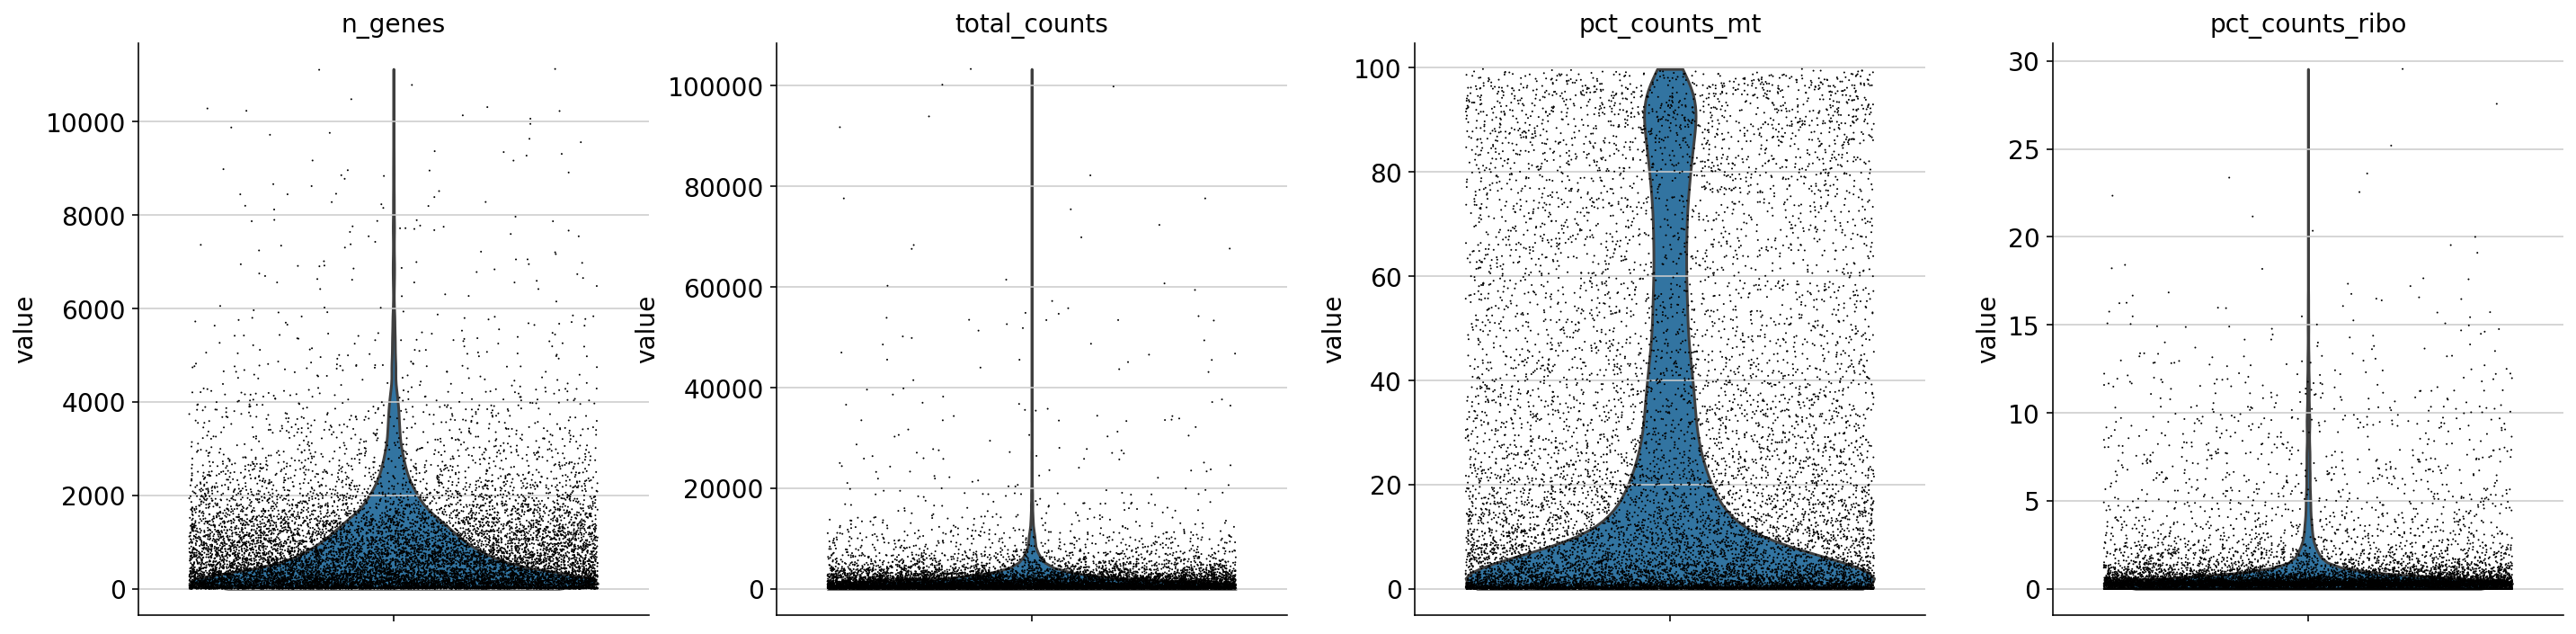

S23


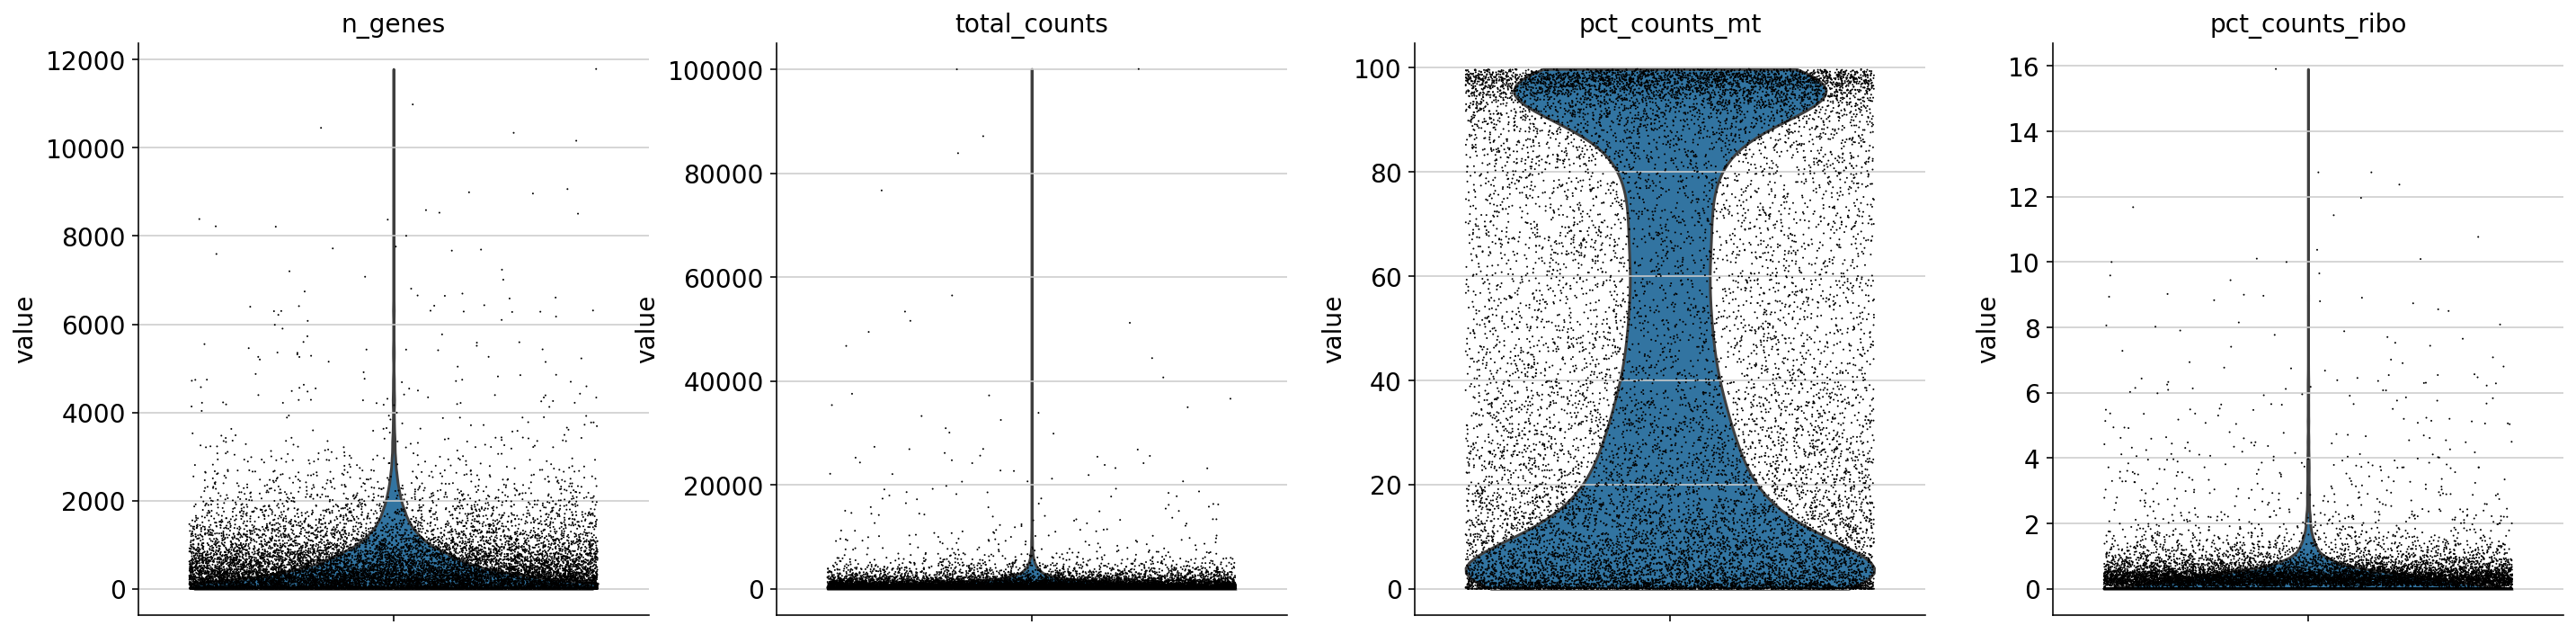

S24


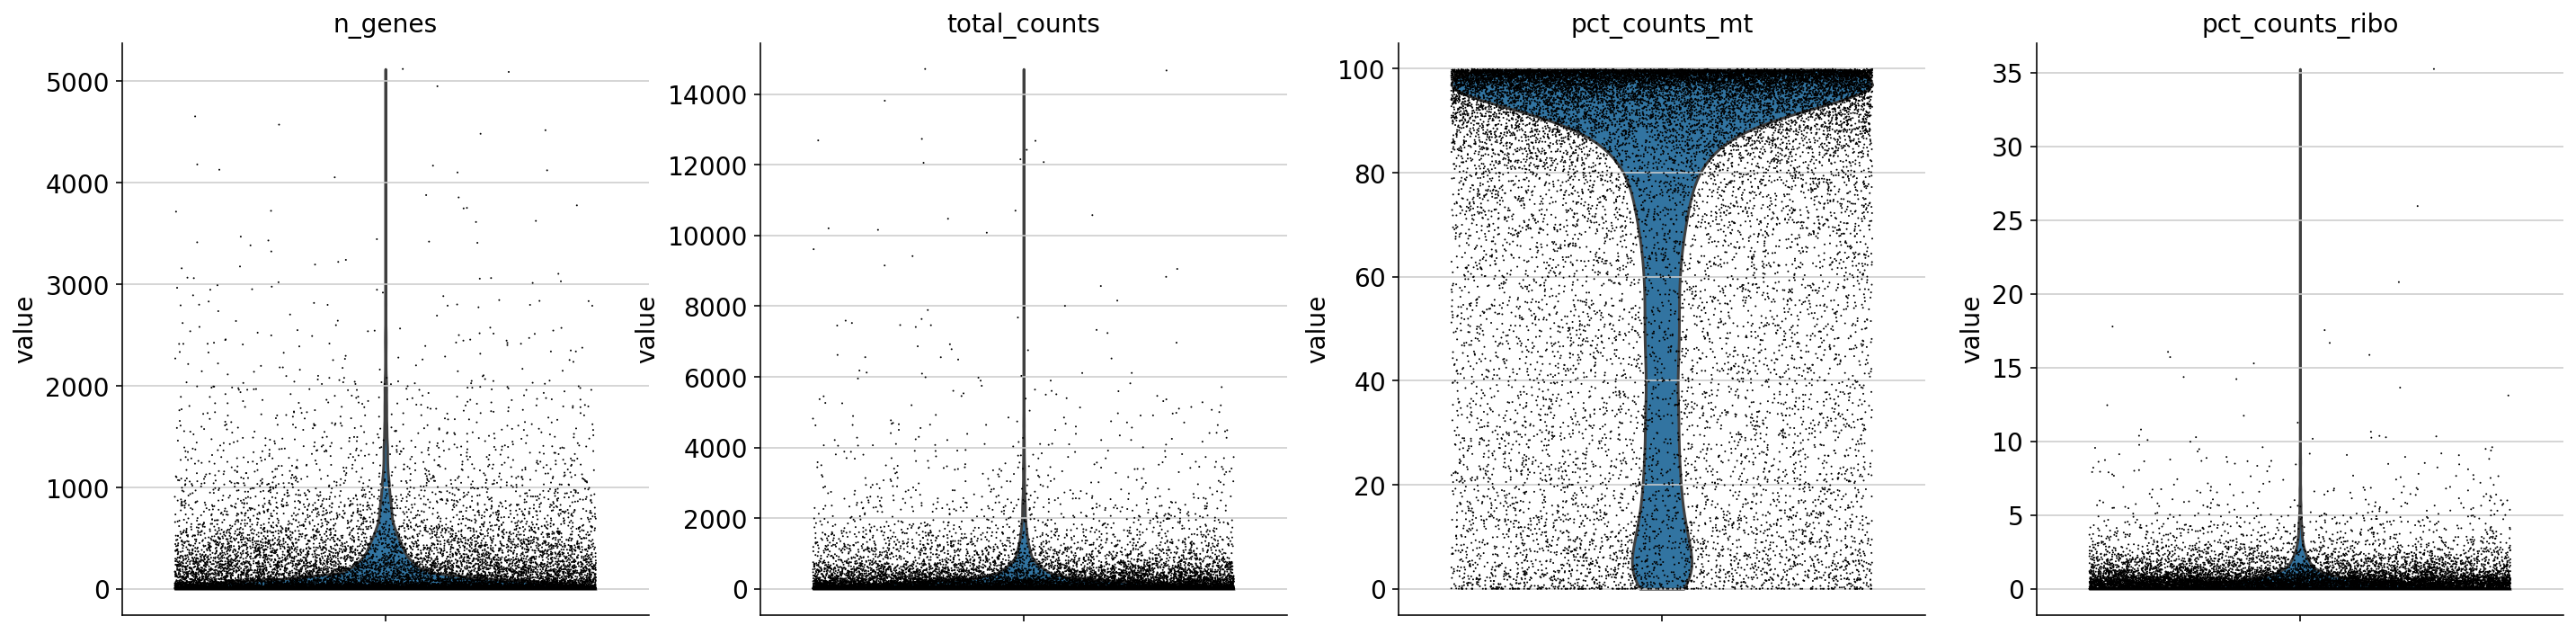

S33


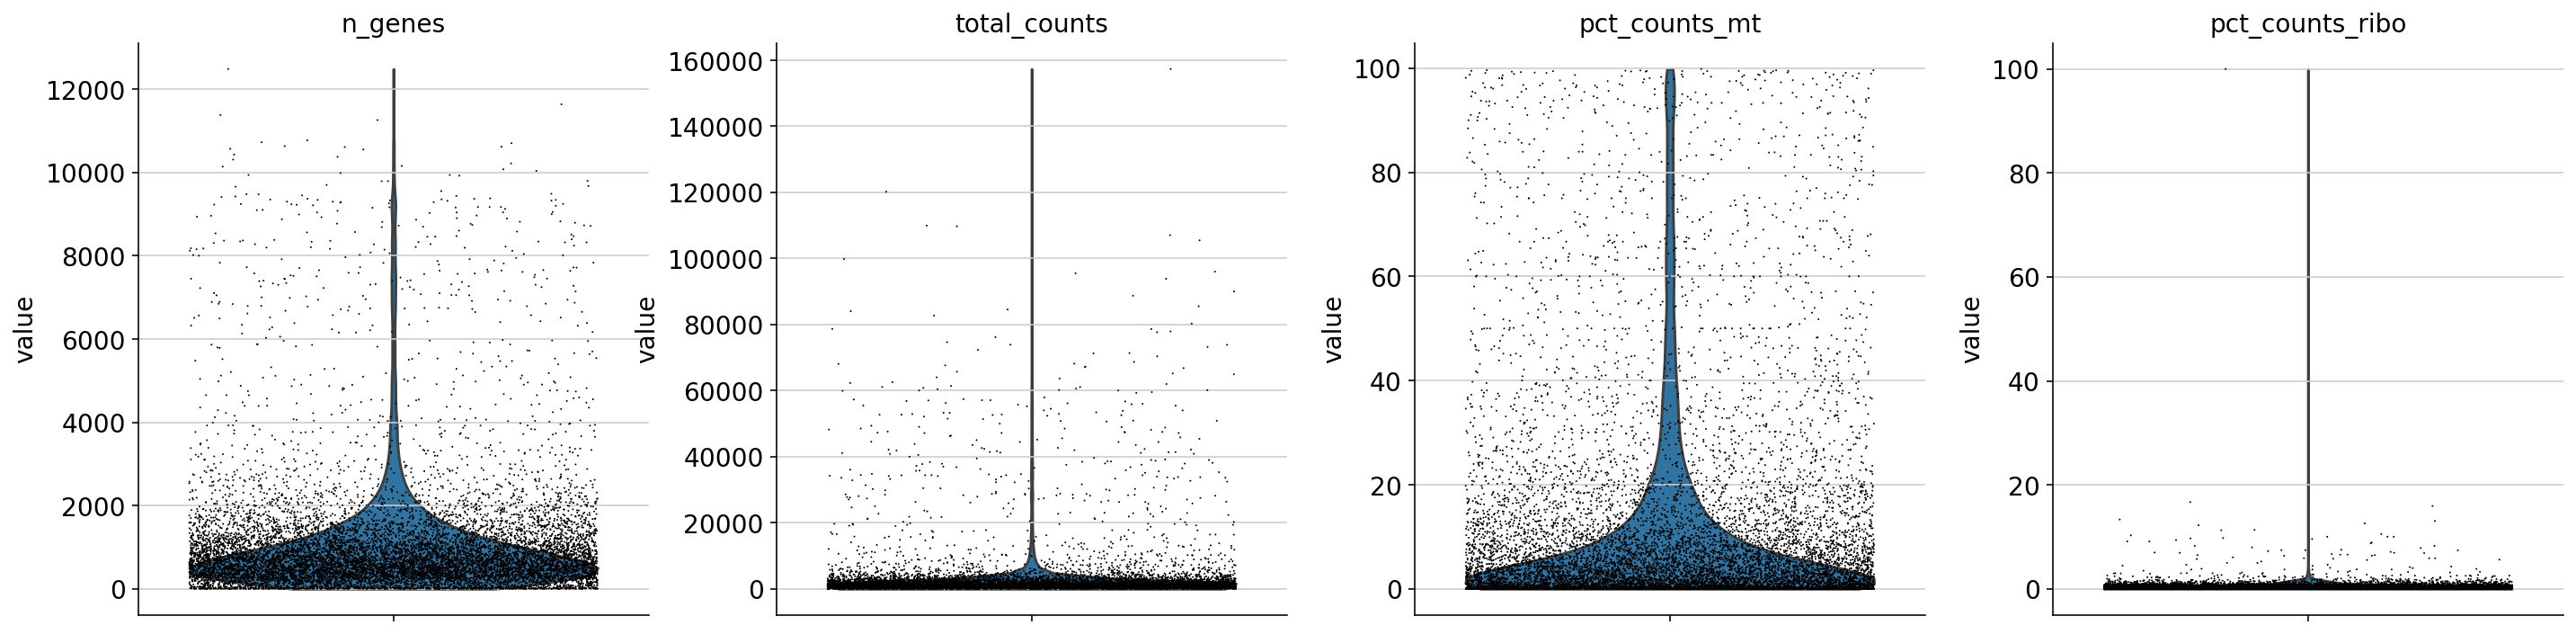

S36


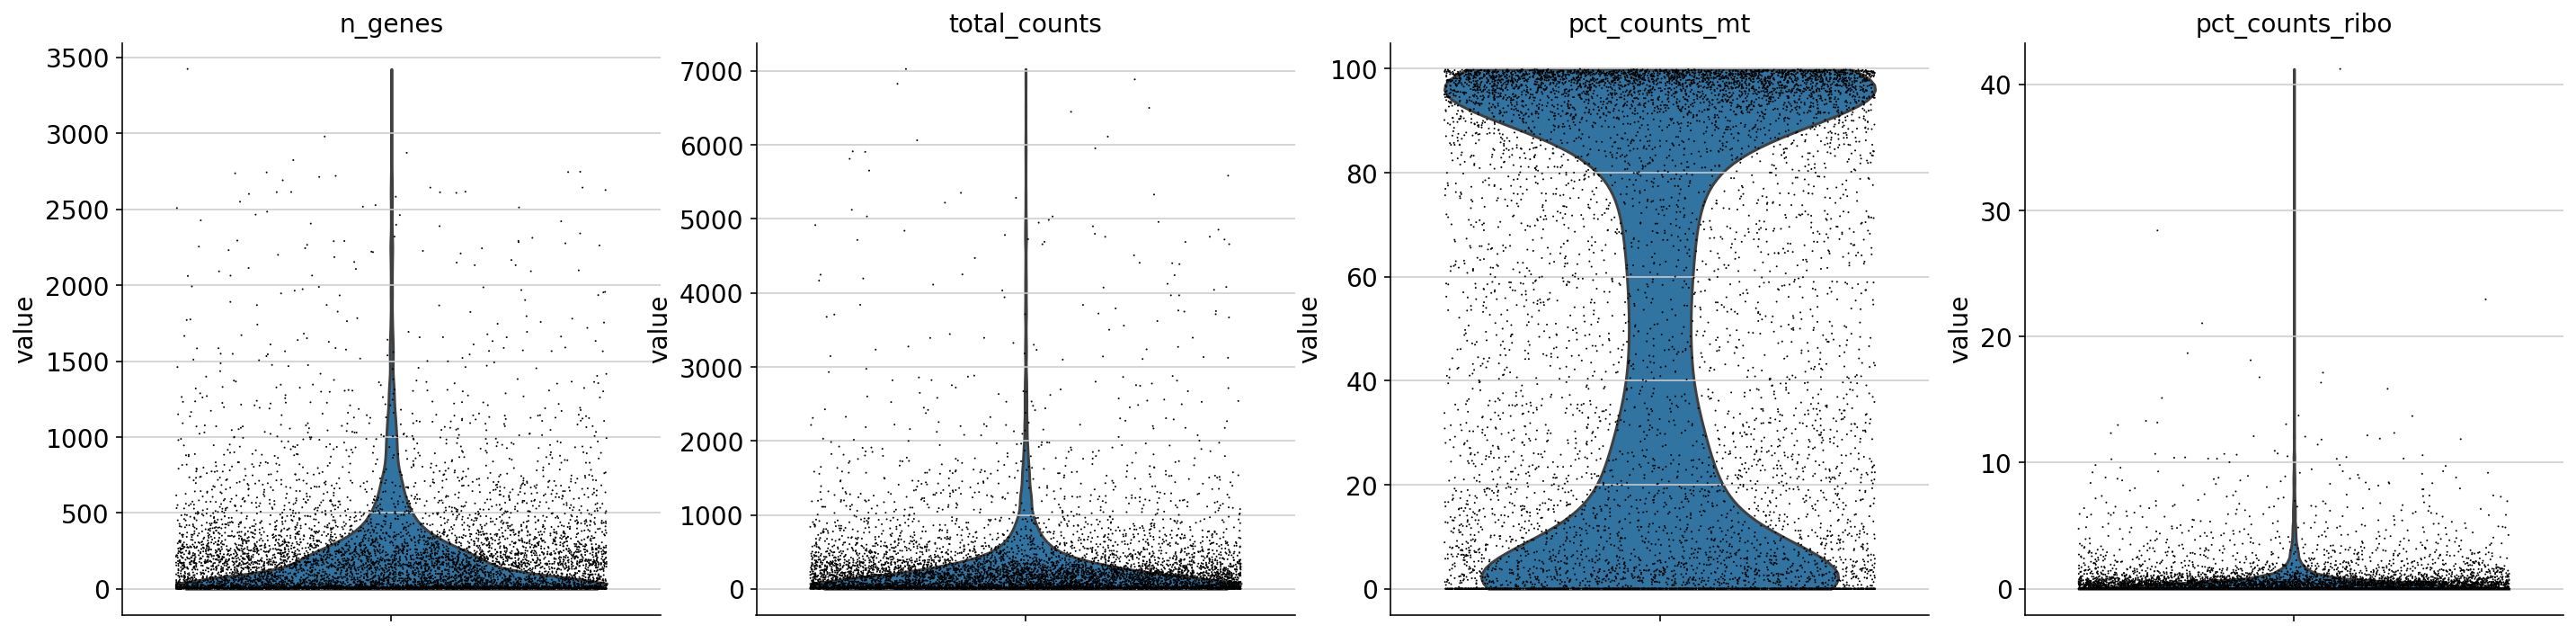

In [25]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.pl.violin(locals()[object_names[i]], ['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True,size =1)#,save= object_names[i]+"_prefilter_all.pdf")
    plt.show()

In [22]:
print("Median numbers without mitochondrial reads\n")


for i in range(numberobj):
    median_counts = np.median(locals()[object_names[i]].obs['total_counts_mito'])
    mean_counts= int(np.mean(locals()[object_names[i]].obs['total_counts_mito']))

    median_counts_mito = np.median(locals()[object_names[i]].obs['total_counts']) 
    mean_counts_mito =int(np.mean(locals()[object_names[i]].obs['total_counts']))

    median_difference = median_counts - median_counts_mito 
    mean_difference = mean_counts -  mean_counts_mito
    
    pct_median_diff = median_difference / median_counts
    pct_mean_diff = mean_difference/mean_counts
    
    print(object_names[i],'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']), '\n',
            "\tmedian reads/nuclei:",median_counts, '(',median_difference,'\t', pct_median_diff,'%',')','\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:", mean_counts, '(',mean_difference,'\t', pct_mean_diff,'%',')','\n')

Median numbers without mitochondrial reads

adata_S06 
 	median genes/nuclei: 511.0 
 	median reads/nuclei: 963.0 ( 275.0 	 0.28556593977154726 % ) 
 	mean genes/nuclei: 927 
 	mean reads/nuclei: 2240 ( 236 	 0.10535714285714286 % ) 

adata_S07 
 	median genes/nuclei: 858.0 
 	median reads/nuclei: 1427.5 ( 233.0 	 0.16322241681260946 % ) 
 	mean genes/nuclei: 1041 
 	mean reads/nuclei: 2285 ( 250 	 0.10940919037199125 % ) 

adata_S09 
 	median genes/nuclei: 156.0 
 	median reads/nuclei: 626.0 ( 452.5 	 0.7228434504792333 % ) 
 	mean genes/nuclei: 228 
 	mean reads/nuclei: 814 ( 524 	 0.6437346437346437 % ) 

adata_S11 
 	median genes/nuclei: 436.0 
 	median reads/nuclei: 672.0 ( 147.0 	 0.21875 % ) 
 	mean genes/nuclei: 472 
 	mean reads/nuclei: 921 ( 270 	 0.2931596091205212 % ) 

adata_S16 
 	median genes/nuclei: 636.0 
 	median reads/nuclei: 849.0 ( 38.0 	 0.0447585394581861 % ) 
 	mean genes/nuclei: 801 
 	mean reads/nuclei: 1283 ( 49 	 0.03819173811379579 % ) 

adata_S22 
 	median

### Save preprocessed files

In [23]:
for i in range(numberobj):
    locals()[object_names[i]].write(os.path.join('data/preprocessed_wang_'+object_names[i][6:]+'.h5ad'))

In [24]:
!ls data/

preprocessed_agarwal_GSM4157068.h5ad  preprocessed_wang_S16.h5ad
preprocessed_agarwal_GSM4157069.h5ad  preprocessed_wang_S22.h5ad
preprocessed_agarwal_GSM4157070.h5ad  preprocessed_wang_S23.h5ad
preprocessed_agarwal_GSM4157072.h5ad  preprocessed_wang_S24.h5ad
preprocessed_agarwal_GSM4157074.h5ad  preprocessed_wang_S33.h5ad
preprocessed_agarwal_GSM4157076.h5ad  preprocessed_wang_S36.h5ad
preprocessed_agarwal_GSM4157078.h5ad  preprocessed_welch_SN_MD5534a.h5ad
preprocessed_altena_g004.h5ad	      preprocessed_welch_SN_MD5534b.h5ad
preprocessed_altena_g005.h5ad	      preprocessed_welch_SN_MD5534c.h5ad
preprocessed_altena_g011.h5ad	      preprocessed_welch_SN_MD5534d.h5ad
preprocessed_altena_g012.h5ad	      preprocessed_welch_SN_MD5534e.h5ad
preprocessed_altena_g013.h5ad	      preprocessed_welch_SN_MD5534f.h5ad
preprocessed_altena_g014.h5ad	      preprocessed_welch_SN_MD5828a.h5ad
preprocessed_altena_g015.h5ad	      preprocessed_welch_SN_MD5828b.h5ad
preprocessed_altena_g016.h5ad	      prep